# Project Idea
- A firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. The goal is to build a model that predicts whether a player will have an NBA career lasting five years or more. 

- The data for this project consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. The target feature is a Boolean value that indicates whether a given player will last in the league for five years.

## Step 1: Import Packages and Load Data

In [1]:
# Import libraries and modules.
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Load extracted_nba_players.csv into a DataFrame
extracted_data = pd.read_csv('extracted_nba_players.csv')

# Display the first few rows of data
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


In [3]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fg            1340 non-null   float64
 1   3p            1340 non-null   float64
 2   ft            1340 non-null   float64
 3   reb           1340 non-null   float64
 4   ast           1340 non-null   float64
 5   stl           1340 non-null   float64
 6   blk           1340 non-null   float64
 7   tov           1340 non-null   float64
 8   target_5yrs   1340 non-null   int64  
 9   total_points  1340 non-null   float64
 10  efficiency    1340 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 115.3 KB


## Step 2: Model Preparation

In [4]:
# Define the y (target) feature
y = extracted_data['target_5yrs']

# Define the X (predictor) feature
X = extracted_data.drop('target_5yrs', axis = 1)

In [5]:
# Split the data into training and testing with a ratio of 75/25
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# Confirm the split process
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 10), (335, 10), (1005,), (335,))

## Step 3: Model Building
- Given the assumption that the features are normally distributed and continuous, the **Gaussian Naive Bayes algorithm** is most appropriate for your data

In [7]:
# Create an object `nb` to be the appropriate implementation of Naive Bayes
nb = naive_bayes.GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Apply the model to predict on the test data
y_pred = nb.predict(X_test)

## Step 4: Results and Evaluation

In [8]:
# Print some leverage metrics
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
print('precision score:', metrics.precision_score(y_test, y_pred))
print('recall score:', metrics.recall_score(y_test, y_pred))
print('f1 score:', metrics.f1_score(y_test, y_pred))

accuracy score: 0.6985074626865672
precision score: 0.8211920529801324
recall score: 0.6262626262626263
f1 score: 0.7106017191977076


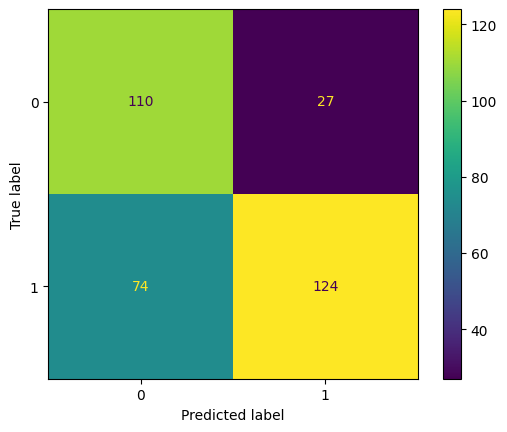

In [9]:
# Construct a confusion matrix for the predicted and test values
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line
disp.plot()

**Insight:** 
- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.
- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8212).
- True negatives and false negatives are closer in number, which explains the worse recall score.

## Executive Summary
- The model provides some value in predicting an NBA player's chances of playing for five years or more.
- Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.